<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 5</span>  </h2>

<h1><span style="color: #1F77B4; font-size: 60px">Réseaux de neurones convolutifs (CNN)</span>  </h1>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
import numpy                         as np
import pandas                        as pd
import tensorflow                    as tf
import matplotlib.pyplot             as plt
from IPython.display                 import display, HTML, Math, Image
import os

<hr style='border-top:4px solid #1F77B4;'>

In [2]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf", bbox_inches='tight')
    fig.savefig(f"{path}.png", format="png", bbox_inches='tight')
    fig.savefig(f"{path}.jpg", format="jpg", bbox_inches='tight')

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.1 : Opération de convolution entre deux matrices "I" et "K"</h3>

In [3]:
import numpy as np
from scipy.signal import convolve2d

# Définir les deux matrices I et K
I = np.array([[1, 1, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 0, 1, 1, 0],
              [0, 1, 1, 0, 0]])

K = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]])

# Application de la convolution
result = convolve2d(I, K, mode='valid')

# Résultat de la convolution
print(result)

[[4 3 4]
 [2 4 3]
 [2 3 4]]


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.2 : Application de la convolution sur l'image "data.camera"</h3>

<h3><span style="font-size: 30px">🎴</span> Figure 5.5 : Filtrage de l'image "data.camera" par différents filtres </h3>

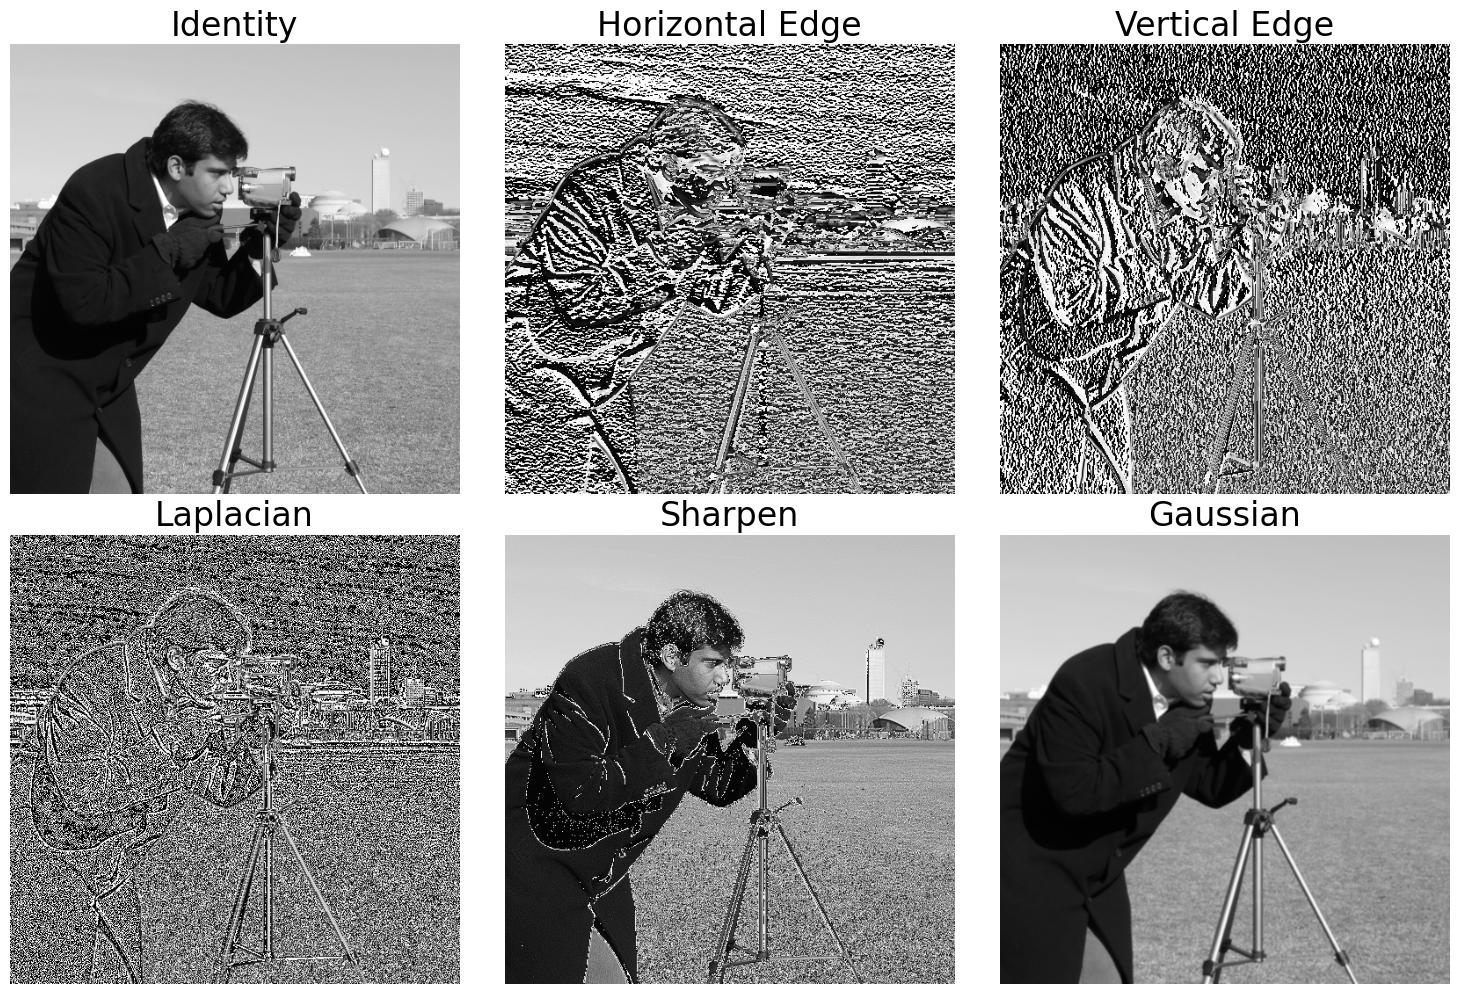

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from skimage import data

# Chargement de l'image
image = data.camera()

# Définir les filtres
filters = {"Identity": np.array([[0, 0, 0], 
                                 [0, 1, 0], 
                                 [0, 0, 0]]),
           "Horizontal Edge": np.array([[-1, -1, -1], 
                                        [0, 0, 0], 
                                        [1, 1, 1]]),
           "Vertical Edge": np.array([[-1, 0, 1], 
                                      [-1, 0, 1], 
                                      [-1, 0, 1]]),
           "Laplacian": np.array([[0, 1, 0], 
                                  [1, -4, 1], 
                                  [0, 1, 0]]),
           "Sharpen": np.array([[0, -1, 0], 
                                [-1, 5, -1], 
                                [0, -1, 0]]),
           "Gaussian": np.array([[1, 2, 1], 
                                 [2, 4, 2], 
                                 [1, 2, 1]]) / 16}

# Appliquer les filtres et afficher les images filtrées
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for ax, (name, kernel) in zip(axes.flatten(), filters.items()):
    filtered_image = convolve(image, kernel)
    ax.imshow(filtered_image, cmap='gray')
    ax.set_title(name,fontsize=24)
    ax.axis('off')

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_5.5/Chap5_Figure_5.5")


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.3 : Création d'une couche de convolution</h3>

In [5]:
from tensorflow.keras.layers import Conv2D

conv_layer = Conv2D(filters=32,             # Nombre de filtres à apprendre
                    kernel_size=(3, 3),     # Taille de chaque filtre 
                    strides=(1, 1),         # Pas des déplacements du filtre
                    padding='valid',        # Aucune bordure ajoutée
                    activation='relu')      # Fonction d'activation ReLU

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.4 : Création d'une image 8x8 du chiffre 0 en noir et blanc et génération de deux versions translatées horizontalement (décalages de 1 et 2 colonnes)
</h3>

In [6]:
# Création d'une image 8x8 du chiffre 0 en noir et blanc et génération de deux versions translatées horizontalement (décalages de 1 et 2 colonnes)

image = np.array([
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]])

# Déplacement de l'image de 1 colonne vers la droite (translation horizontale)
translated_image1 = np.roll(image, shift=1, axis=1)

# Déplacement de l'image de 2 colonnes vers la droite (translation horizontale plus marquée)
translated_image2 = np.roll(image, shift=2, axis=1)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.5 : Implémentation de fonction "max_pooling"</h3>

In [7]:
def max_pooling(image, pool_size=2, stride=2):
    # Récupérer de la hauteur (h) et la largeur (w) de l'image
    h, w = image.shape

    # Calculer les dimensions de la sortie après pooling
    output_height = (h - pool_size) // stride + 1
    output_width  = (w - pool_size) // stride + 1

    # Initialiser une matrice de zéros pour stocker l'image après pooling
    pooled_image = np.zeros((output_height, output_width))

    # Parcourir chaque région où il faut appliquer le pooling
    # Extraire la sous-région de taille pool_size x pool_size et appliquer le max pooling
    for i in range(output_height):
        for j in range(output_width):
            region = image[i * stride:i * stride + pool_size, 
                           j * stride:j * stride + pool_size]
            pooled_image[i, j] = np.max(region)

    return pooled_image

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.6 : Application du max pooling sur 3 différentes images</h3>

In [8]:
pooled_original    = max_pooling(image)
pooled_translated1 = max_pooling(translated_image1)
pooled_translated2 = max_pooling(translated_image2)

<h3><span style="font-size: 30px">🎴</span> Figure 5.12 : Invariance locale du max pooling avec un filtre 2 X 2 et un pas de 2 </h3>

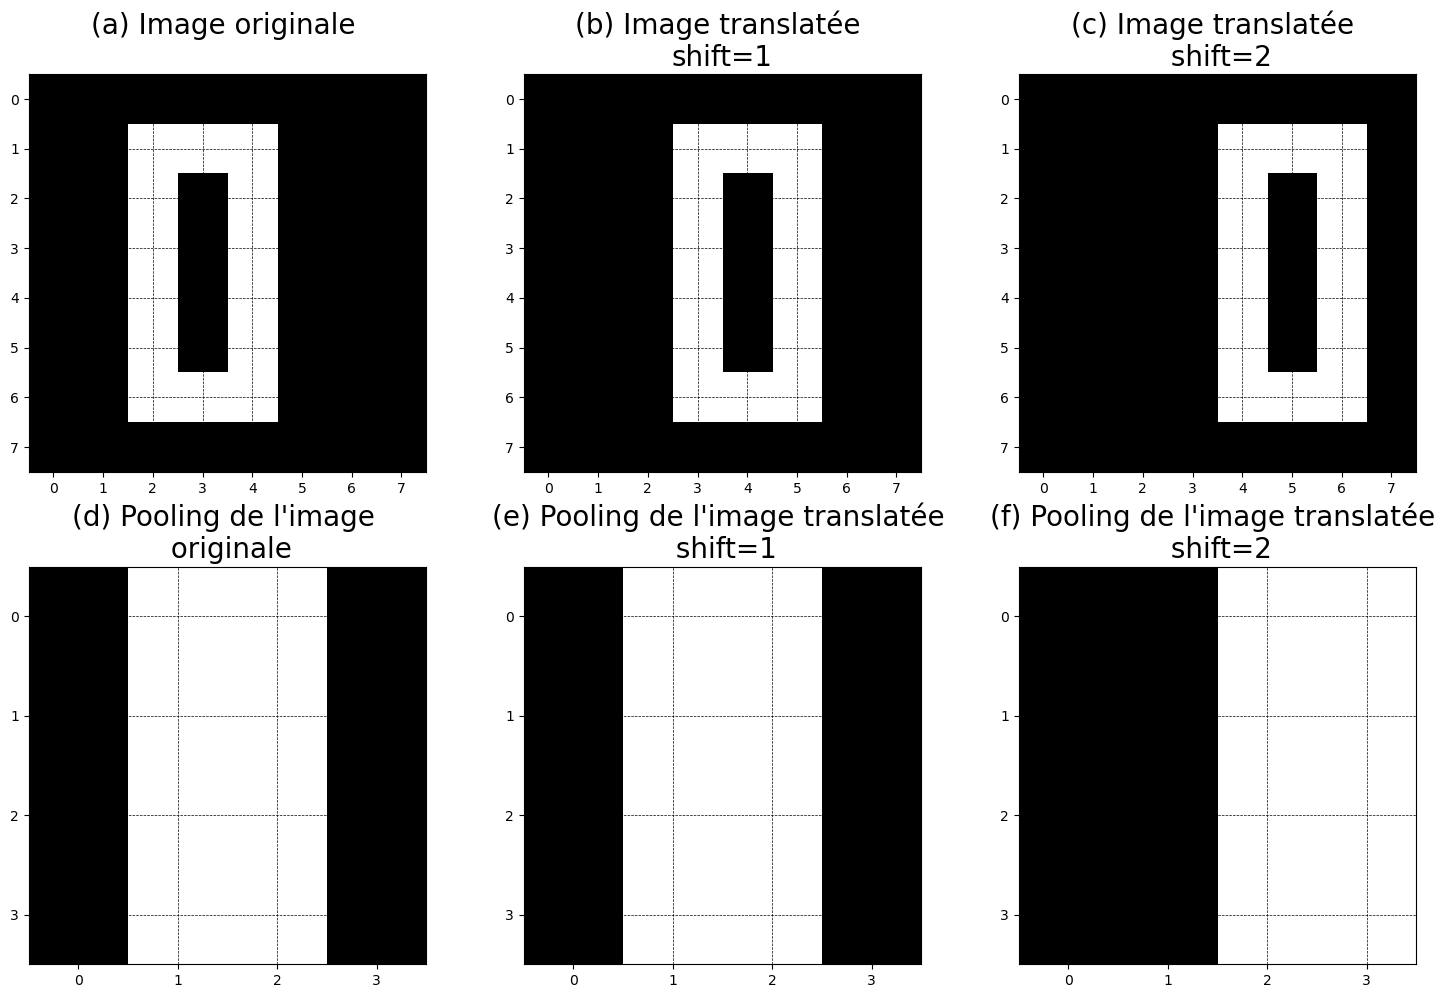

In [9]:
# Affichage
fig, ax = plt.subplots(2, 3, figsize=(15,10))

# Sous-graphiques
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("(a) Image originale \n ", fontsize=20)
ax[0, 0].set_xticks(range(8))  # Graduation unitaire pour x
ax[0, 0].set_yticks(range(8))  # Graduation unitaire pour y
ax[0, 0].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[0, 1].imshow(translated_image1, cmap='gray')
ax[0, 1].set_title("(b) Image translatée \nshift=1", fontsize=20)
ax[0, 1].set_xticks(range(8))
ax[0, 1].set_yticks(range(8))
ax[0, 1].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[0, 2].imshow(translated_image2, cmap='gray')
ax[0, 2].set_title("(c) Image translatée \n shift=2", fontsize=20)

ax[0, 2].set_xticks(range(8))
ax[0, 2].set_yticks(range(8))
ax[0, 2].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 0].imshow(pooled_original, cmap='gray')
ax[1, 0].set_title("(d) Pooling de l'image \n originale", fontsize=20)
ax[1, 0].set_xticks(range(4))
ax[1, 0].set_yticks(range(4))
ax[1, 0].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 1].imshow(pooled_translated1, cmap='gray')
ax[1, 1].set_title("(e) Pooling de l'image translatée \n shift=1", fontsize=20)

ax[1, 1].set_xticks(range(4))
ax[1, 1].set_yticks(range(4))
ax[1, 1].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 2].imshow(pooled_translated2, cmap='gray')
ax[1, 2].set_title("(f) Pooling de l'image translatée \n shift=2", fontsize=20)
ax[1, 2].set_xticks(range(4))
ax[1, 2].set_yticks(range(4))
ax[1, 2].grid(True, color='black', linestyle='--', linewidth=0.5)

# Activer les axes pour tous les sous-graphiques
for a in ax.ravel():
    a.axis('on')  # Afficher les axes

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_5.12/Chap5_Figure_5.12")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.7 : Implémentation de fonction "average_pooling"</h3>

In [10]:
def average_pooling(image, pool_size=2, stride=2):
    # Récupérer de la hauteur (h) et la largeur (w) de l'image
    h, w = image.shape

    # Calculer les dimensions de l'image après pooling
    output_height = (h - pool_size) // stride + 1
    output_width = (w - pool_size) // stride + 1

    # Initialiser une matrice de zéros pour stocker l'image après pooling
    pooled_image = np.zeros((output_height, output_width))

    # Parcourir chaque région où appliquer le pooling
    for i in range(output_height):
        for j in range(output_width):
            region = image[i * stride:i * stride + pool_size, 
                           j * stride:j * stride + pool_size]
            pooled_image[i, j] = np.mean(region)
            
    return pooled_image

<h3><span style="font-size: 30px">🎴</span> Figure 5.13 : Invariance locale de l'average pooling avec un filtre 2 X 2 et un pas de 2 </h3>

In [11]:
# Application du max pooling
pooled_original = average_pooling(image)
pooled_translated1 = average_pooling(translated_image1)
pooled_translated2 = average_pooling(translated_image2)

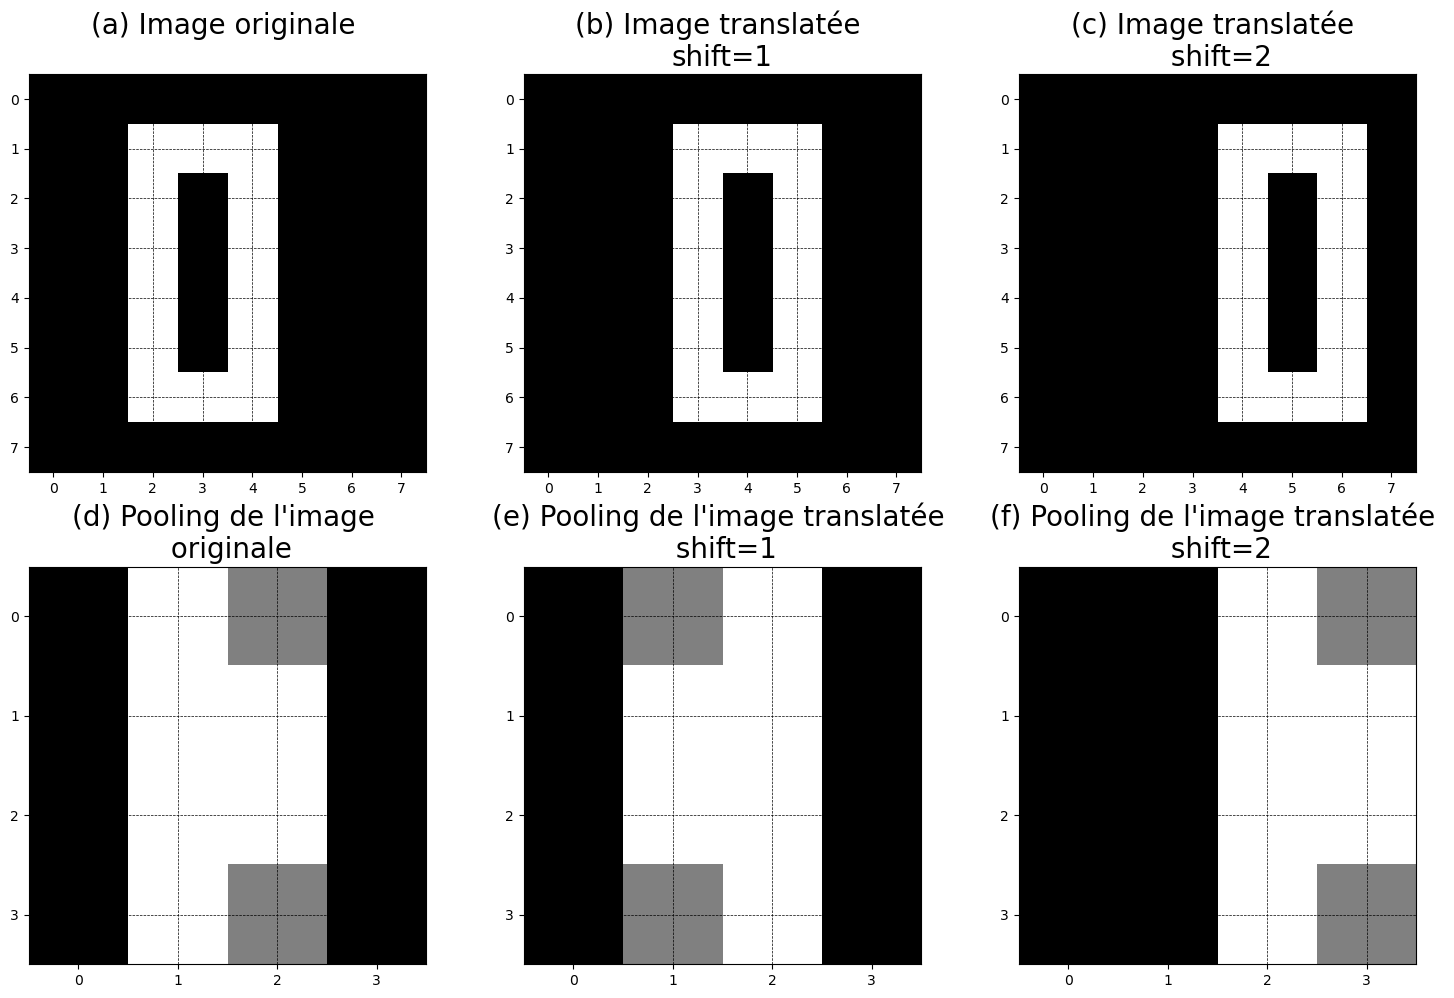

In [12]:
# Affichage
fig, ax = plt.subplots(2, 3, figsize=(15,10))
# Sous-graphiques
ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title("(a) Image originale \n", fontsize=20)
ax[0, 0].set_xticks(range(8))  # Graduation unitaire pour x
ax[0, 0].set_yticks(range(8))  # Graduation unitaire pour y
ax[0, 0].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[0, 1].imshow(translated_image1, cmap='gray')
ax[0, 1].set_title("(b) Image translatée \nshift=1", fontsize=20)

ax[0, 1].set_xticks(range(8))
ax[0, 1].set_yticks(range(8))
ax[0, 1].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[0, 2].imshow(translated_image2, cmap='gray')
ax[0, 2].set_title("(c) Image translatée \n shift=2", fontsize=20)
ax[0, 2].set_xticks(range(8))
ax[0, 2].set_yticks(range(8))
ax[0, 2].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 0].imshow(pooled_original, cmap='gray')
ax[1, 0].set_title("(d) Pooling de l'image \n originale", fontsize=20)
ax[1, 0].set_xticks(range(4))
ax[1, 0].set_yticks(range(4))
ax[1, 0].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 1].imshow(pooled_translated1, cmap='gray')
ax[1, 1].set_title("(e) Pooling de l'image translatée \n shift=1", fontsize=20)
ax[1, 1].set_xticks(range(4))
ax[1, 1].set_yticks(range(4))
ax[1, 1].grid(True, color='black', linestyle='--', linewidth=0.5)

ax[1, 2].imshow(pooled_translated2, cmap='gray')
ax[1, 2].set_title("(f) Pooling de l'image translatée \n shift=2", fontsize=20)
ax[1, 2].set_xticks(range(4))
ax[1, 2].set_yticks(range(4))
ax[1, 2].grid(True, color='black', linestyle='--', linewidth=0.5)

# Activer les axes pour tous les sous-graphiques
for a in ax.ravel():
    a.axis('on')  # Afficher les axes

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_5.13/Chap5_Figure_5.13")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.8 : Implémentation de couches de sous-échantillonnage (Pooling)</h3>

In [13]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D

# Préparation de l'image pour Keras : ajout de dimensions (batch, hauteur, largeur, canaux)
# et conversion en float32 (requis pour les opérations de pooling)
# Batch size = 1, taille 8x8, 1 canal
image = image.reshape(1, 8, 8, 1).astype('float32') 

# Définir les différentes couches de pooling
max_pooling            = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
average_pooling        = AveragePooling2D(pool_size=(2, 2), strides=(2, 2))
global_max_pooling     = GlobalMaxPooling2D()
global_average_pooling = GlobalAveragePooling2D()

# Appliquer les différentes couches de pooling à une image donnée (ou une carte de caractéristiques)
max_pooled_output            = max_pooling(image).numpy().squeeze()
average_pooled_output        = average_pooling(image).numpy().squeeze()
global_max_pooled_output     = global_max_pooling(image).numpy()
global_average_pooled_output = global_average_pooling(image).numpy()

<h3><span style="font-size: 30px">🎴</span> Figure 5.14 : Comparaison de pooling (a) Image originale (b) max pooling, (c) average pooling et (d) pooling global max et average </h3>

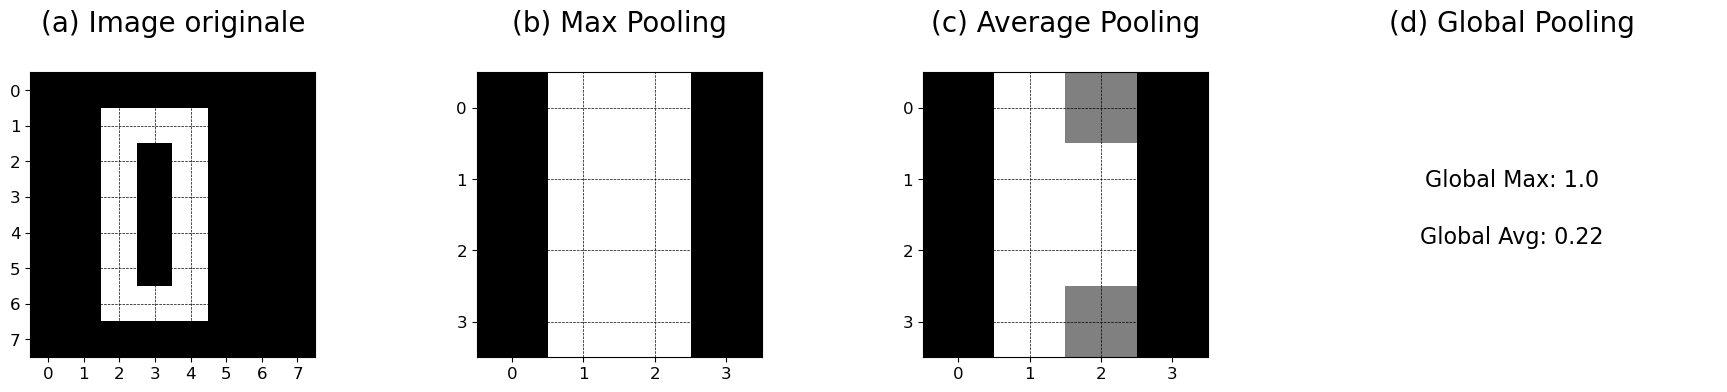

In [14]:
# Affichage
fig, axes = plt.subplots(1, 4, figsize=(18,4))

# Image originale
axes[0].imshow(image.squeeze(), cmap='gray')
axes[0].set_title("(a) Image originale\n", fontsize=20)
axes[0].set_xticks(range(8))
axes[0].set_yticks(range(8))
axes[0].tick_params(labelsize=12)
axes[0].grid(True, color='black', linestyle='--', linewidth=0.5)

# Max pooling
axes[1].imshow(max_pooled_output, cmap='gray')
axes[1].set_title("(b) Max Pooling\n", fontsize=20)
axes[1].set_xticks(range(4))
axes[1].tick_params(labelsize=12)
axes[1].set_yticks(range(4))
axes[1].grid(True, color='black', linestyle='--', linewidth=0.5)


# Average pooling
axes[2].imshow(average_pooled_output, cmap='gray')
axes[2].set_title("(c) Average Pooling\n", fontsize=20)
axes[2].set_xticks(range(4))
axes[2].set_yticks(range(4))
axes[2].tick_params(labelsize=12)
axes[2].grid(True, color='black', linestyle='--', linewidth=0.5)


# Global pooling (texte)
axes[3].text(0.5, 0.6, f"Global Max: {global_max_pooled_output.squeeze()}", ha='center', fontsize=16)
axes[3].text(0.5, 0.4, f"Global Avg: {global_average_pooled_output.squeeze():.2f}", ha='center', fontsize=16)
axes[3].set_title("(d) Global Pooling\n", fontsize=20)
axes[3].axis('off')

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_5.14/Chap5_Figure_5.14")

<h3><span style="font-size: 30px">🎴</span> Figure 5.17 : Échantillons de chiffres manuscrits extraits du jeu de données MNIST, affichés en niveaux de gris inversés (fond blanc) </h3>

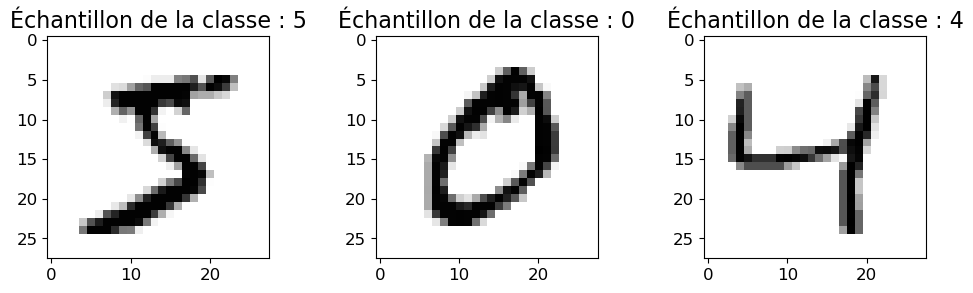

In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Chargement des données MNIST
(x_train, y_train), (_, _) = mnist.load_data()

# Affichage de 3 images
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i in range(3):
    axes[i].imshow(255 - x_train[i], cmap='gray')
    axes[i].set_title(f"Échantillon de la classe : {y_train[i]}", fontsize=16)
    axes[i].axis('on')
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Optimisation de la mise en page
plt.tight_layout()

# Affichage des graphiques
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_5.17/Chap5_Figure_5.17")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.9 : Mise en oeuvre de l'architechture LeNet-5</h3>

In [16]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import Dense, Softmax

tf.keras.backend.clear_session()

# Définir le modèle
def create_lenet5():
    model = Sequential()

    # ---------- Couche C1 : Convolution 
    # Entrée : image 32x32 en niveaux de gris (1 canal)
    model.add(Conv2D(filters=6, kernel_size=(5, 5), 
                     strides=1, activation='sigmoid',
                     input_shape=(32, 32, 1),padding='valid'))

    # ---------- Couche S2 : Sous-échantillonnage (Average Pooling) 
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

     # ---------- Couche C3 : Convolution 
    model.add(Conv2D(filters=16, kernel_size=(5, 5), strides=1, 
                     activation='sigmoid', padding='valid'))

    # ---------- Couche S4 : Average Pooling 
    model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

    # ---------- Couche C5 : Convolution 
    model.add(Conv2D(filters=120, kernel_size=(5, 5), strides=1, 
                     activation='sigmoid', padding='valid'))

    # ---------- Couche Flatten 
    model.add(Flatten())

    # ---------- Couche C6 : Fully Connected 
    model.add(Dense(units=84, activation='sigmoid'))

    # ---------- Couche de sortie 
    # 10 neurones avec softmax pour classification 
    model.add(Dense(units=10, activation='softmax'))
    return model

# Instancier le modèle Lenet5
lenet5 = create_lenet5()

# Afficher le résumé de l'architecture
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.10 : Couche de normalisation locale</h3>

In [17]:
import tensorflow.keras.backend as K

# Fonction pour LRN
def lrn(x):
    alpha = 1e-4
    beta = 0.75
    k = 2
    n = 5  # Nombre de voisins pour la normalisation
    square = K.square(x)
    pooled = K.pool2d(square, pool_size=(n, n), strides=(1, 1),
                      padding="same", pool_mode="avg")
    return x / K.pow(k + alpha * pooled, beta)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.11 : Fonction pour créer une architecture AlexNet avec LRN (Local Response Normalization)</h3>

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda

tf.keras.backend.clear_session()

# Exemple d'utilisation dans AlexNet
def create_alexnet_with_lrn(input_shape=(227, 227, 3), num_classes=1000):
    model = Sequential()
    
    # Convolutional Layer 1 + LRN
    model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(Lambda(lrn))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    # Convolutional Layer 2 + LRN
    model.add(Conv2D(filters=256, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(Lambda(lrn))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    # Convolutional Layers 3, 4, 5
    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
    
    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

# Création du modèle
alexnet_lrn_model = create_alexnet_with_lrn(input_shape=(227, 227, 3), num_classes=1000)

# Résumé du modèle
alexnet_lrn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 55, 55, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 27, 27, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.12 : Implémentation du bloc résiduel</h3>

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, Add

def residual_block(x, filters, stride=1):
    # Sauvegarde de l'entrée pour la connexion résiduelle (shortcut)
    shortcut = x

    # Première couche convolutionnelle + normalisation + activation
    x = Conv2D(filters, kernel_size=3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Deuxième couche convolutionnelle + normalisation
    x = Conv2D(filters, kernel_size=3, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    # Ajustement du chemin shortcut si dimensions différentes (projection via 1x1 conv)
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=1, 
                          strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

     # Addition du chemin principal et du chemin raccourci
    x = Add()([x, shortcut])
    
    # Activation finale après l'addition résiduelle
    x = ReLU()(x)

    return x

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.13 : Implémentation de ResNet-34</h3>

In [20]:
def ResNet34(input_shape=(224, 224, 3), num_classes=1000):
    inputs = Input(shape=input_shape)

    # ---- Couche d'entrée  
    # Convolution 7x7 avec 64 filtres, stride de 2, et padding 'same' pour maintenir la taille
    
    x = Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # ---- Étape Conv2_x : 3 blocs avec 64 filtres
    x = residual_block(x, 64, stride=1)
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # ---- Étape Conv3_x : 4 blocs avec 128 filtres 
    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    # ---- Étape Conv4_x : 6 blocs avec 256 filtres
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    # ---- Étape Conv5_x : 3 blocs avec 512 filtres
    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)
    x = residual_block(x, 512)

    # Couche de sortie : global average pooling + dense softmax
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # ---- Construction du modèle final
    model = Model(inputs, outputs)
    return model

# Nettoyage session précédente
tf.keras.backend.clear_session()

# Instancier le modèle ResNet-34 avec les paramètres par défaut
resnet34 = ResNet34()

# Affichage du résumé
resnet34.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 112, 112,  │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 56, 56,    │     36,928 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 56, 56,    │          0 │ add[0][0]         │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_2[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     36,928 │ re_lu_3[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_4[0][0]  

 Total params: 21,823,208 (83.25 MB)

 Trainable params: 21,806,184 (83.18 MB)

 Non-trainable params: 17,024 (66.50 KB)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 5.14 : Chargement du modèle ResNet-50 pré-entraîné sur ImageNet</h3>

In [21]:
# Nettoyage session précédente
tf.keras.backend.clear_session()

In [22]:
from tensorflow.keras.applications import ResNet50

# Charger ResNet-50 pré-entraîné sur ImageNet
model_resnet50 = ResNet50(weights='imagenet',         # Poids pré-entraînés 
                          input_shape=(224, 224, 3),  # Taille d'entrée 
                          include_top=True)           # Couche dense 

# Afficher le résumé de l'architecture
model_resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

<hr style='border-top:4px solid #1F77B4;'>